In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Config ----
base_dir = r"Y:\0_Ishraq\New Pool Boiling Video"

# ---- Select run folder (no reading yet) ----
boiling_id = input("Enter the Boiling ID (e.g., 314): ").strip()
folder_path = os.path.join(base_dir, f"Boiling-{boiling_id}")

# Exact filenames (fixed)
temperature_name = "Temperature.lvm"
dc_name = "DC_power.lvm"

# Build full paths
temperature_path = os.path.join(folder_path, temperature_name)
dc_path = os.path.join(folder_path, dc_name)

# Quick checks (optional)
if not os.path.isdir(folder_path):
    raise FileNotFoundError(f"Folder not found: {folder_path}")
if not os.path.exists(temperature_path):
    raise FileNotFoundError(f"Missing {temperature_name} in {folder_path}")
if not os.path.exists(dc_path):
    raise FileNotFoundError(f"Missing {dc_name} in {folder_path}")

# Store for later steps
file_paths = {
    "Temperature": temperature_path,
    "MagnaDC": dc_path
}

print("✅ Files located (not read):")
for k, v in file_paths.items():
    print(f" - {k}: {v}")

✅ Files located (not read):
 - Temperature: Y:\0_Ishraq\New Pool Boiling Video\Boiling-314\Temperature.lvm
 - MagnaDC: Y:\0_Ishraq\New Pool Boiling Video\Boiling-314\DC_power.lvm


In [28]:
import re

with open(temperature_path, 'r', encoding='utf-8', errors='ignore') as f:
    for i, line in enumerate(f, start=1):
        if i == 11:                  # 11th line (1-indexed)
            time_line = line.strip() # e.g., "Time\t14:17:55.9428834249995120136"
            break

# extract the time string after "Time"
# works whether it's separated by tab or spaces
time_token = re.split(r'\s+', time_line, maxsplit=1)[1]

# trim to microseconds (6 digits)
if '.' in time_token:
    hhmmss, frac = time_token.split('.', 1)
    Temperature_time_str = f"{hhmmss}.{frac[:6]}"   # -> "14:17:55.942883"
else:
    Temperature_time_str = time_token               # no fractional part present

# split into components
hh, mm, ss_frac = Temperature_time_str.split(':')
Temperature_hour   = int(hh)                        # 24-hour clock
Temperature_minute = int(mm)
Temperature_second = float(ss_frac)                 # includes fractional part, e.g., 55.942883

print("Start time of Temperature (trimmed to microseconds):", Temperature_time_str)
print("Hour:", Temperature_hour, "| Minute:", Temperature_minute, "| Seconds:", Temperature_second)

Start time of Temperature (trimmed to microseconds): 14:17:55.942883
Hour: 14 | Minute: 17 | Seconds: 55.942883


In [29]:
with open(dc_path, 'r', encoding='utf-8', errors='ignore') as f:
    for i, line in enumerate(f, start=1):
        if i == 11:                  # 11th line (1-indexed)
            time_line = line.strip() # e.g., "Time\t14:17:55.9428834249995120136"
            break

# extract the time string after "Time"
# works whether it's separated by tab or spaces
time_token = re.split(r'\s+', time_line, maxsplit=1)[1]

# trim to microseconds (6 digits)
if '.' in time_token:
    hhmmss, frac = time_token.split('.', 1)
    dc_time_str = f"{hhmmss}.{frac[:6]}"   # -> "14:17:55.942883"
else:
    dc_time_str = time_token               # no fractional part present

# split into components
hh, mm, ss_frac = dc_time_str.split(':')
dc_hour   = int(hh)                        # 24-hour clock
dc_minute = int(mm)
dc_second = float(ss_frac)                 # includes fractional part, e.g., 55.942883

print("Start time of MagnaDC (trimmed to microseconds):", dc_time_str)
print("Hour:", dc_hour, "| Minute:", dc_minute, "| Seconds:", dc_second)

Start time of MagnaDC (trimmed to microseconds): 14:17:59.700799
Hour: 14 | Minute: 17 | Seconds: 59.700799


In [30]:
import pandas as pd

# assumes you already set: temperature_path, dc_path (from your earlier step)

# --- read both files (skip 22 header rows) ---
dataframes = {}
dataframes['Temperature'] = pd.read_csv(temperature_path, sep='\t', skiprows=22, engine='python')
dataframes['MagnaDC']     = pd.read_csv(dc_path,         sep='\t', skiprows=21, engine='python')

if 'Comment' in dataframes['Temperature'].columns:
    dataframes['Temperature'].drop(columns=['Comment'], inplace=True)
if 'Comment' in dataframes['MagnaDC'].columns:
    dataframes['MagnaDC'].drop(columns=['Comment'], inplace=True)

# --- rename columns ---
if 'Temperature' in dataframes:
    df_temp = dataframes['Temperature'].copy()
    col_map = {
        df_temp.columns[0]: 'Time (sec)',
        df_temp.columns[1]: 'Thermo-couple_1',
        df_temp.columns[2]: 'Thermo-couple_2',
        df_temp.columns[3]: 'Thermo-couple_3',
        df_temp.columns[4]: 'Thermo-couple_4',
        df_temp.columns[5]: 'Vapour Temp',
        df_temp.columns[6]: 'Liquid Temp'
    }
    df_temp.rename(columns=col_map, inplace=True)
    dataframes['Temperature'] = df_temp
    print("✅ Renamed Temperature columns.")

if 'MagnaDC' in dataframes:
    df_dc = dataframes['MagnaDC'].copy()
    col_map = {
        df_dc.columns[0]: 'Time (sec)',
        df_dc.columns[1]: 'Set Voltage (V)',
        df_dc.columns[2]: 'Set Current (A)',
        df_dc.columns[3]: 'Output Voltage (V)',
        df_dc.columns[4]: 'Output Current (A)',
        df_dc.columns[5]: 'Output Power (W)'
    }
    df_dc.rename(columns=col_map, inplace=True)
    dataframes['MagnaDC'] = df_dc
    print("✅ Renamed DC Power columns.")


for key in ['Temperature', 'MagnaDC']:
    if key in dataframes:
        df = dataframes[key]
        print(f"\n===== {key} : head() =====")
        print(df.head())
        print(f"\n===== {key} : tail() =====")
        print(df.tail())
    else:
        print(f"\n[!] DataFrame '{key}' not found in dataframes.")

✅ Renamed Temperature columns.
✅ Renamed DC Power columns.

===== Temperature : head() =====
   Time (sec)  Thermo-couple_1  Thermo-couple_2  Thermo-couple_3  \
0    0.000000         97.78605         98.18584        98.369896   
1    0.000333         97.78605         98.18584        98.369896   
2    0.000667         97.78605         98.18584        98.369896   
3    0.001000         97.78605         98.18584        98.369896   
4    0.001333         97.78605         98.18584        98.369896   

   Thermo-couple_4  Vapour Temp  Liquid Temp  
0        98.502382    98.690145    99.391743  
1        98.502382    98.690145    99.391743  
2        98.502382    98.690145    99.391743  
3        98.502382    98.690145    99.391743  
4        98.502382    98.690145    99.391743  

===== Temperature : tail() =====
         Time (sec)  Thermo-couple_1  Thermo-couple_2  Thermo-couple_3  \
1088995  362.989258       110.484774       109.730936       108.919514   
1088996  362.989592       110.4847

In [ ]:
# Extract data for plotting
# Extract data from Temperature file
df_temp = dataframes['Temperature']
time_temp = df_temp['Time (sec)']
T1 = df_temp['Thermo-couple_1']
T2 = df_temp['Thermo-couple_2']
T3 = df_temp['Thermo-couple_3']
T4 = df_temp['Thermo-couple_4']
T_vapour = df_temp['Vapour Temp']
T_liquid = df_temp['Liquid Temp']

# Extract data from Pressure file
df_dc = dataframes['MagnaDC']
time_dc = df_dc['Time (sec)']
Set_Voltage = df_dc['Set Voltage (V)']
Set_Current = df_dc['Set Current (A)']
Output_Voltage = df_dc['Output Voltage (V)']
Output_Current = df_dc['Output Current (A)']
Power_Watts = df_dc['Output Power (W)']


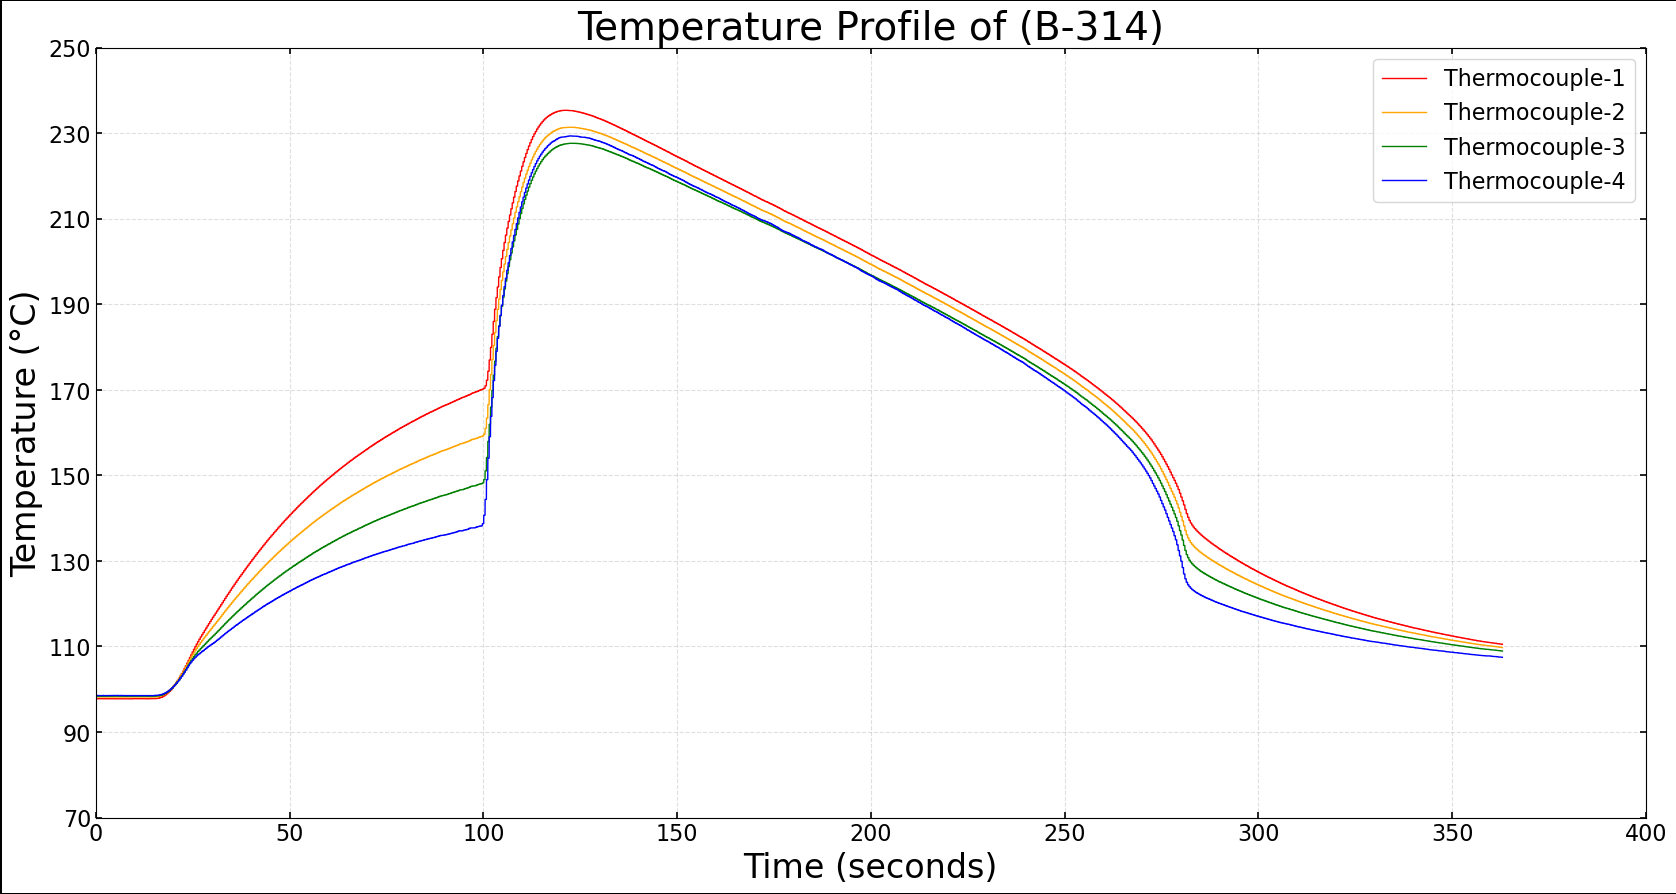

In [32]:
## Create the plot
plt.figure(figsize=(20, 10))


plt.plot(time_temp, T1, label='Thermocouple-1', color='red', linewidth=1)
plt.plot(time_temp, T2, label='Thermocouple-2', color='orange', linewidth=1)
plt.plot(time_temp, T3, label='Thermocouple-3', color='green', linewidth=1)
plt.plot(time_temp, T4, label='Thermocouple-4', color='blue', linewidth=1)

# Set axis limits
#plt.xlim(time_temp.min(), time_temp.max())  # X-axis from min to max time

# Find the overall min and max from T1, T2, T3, and T4
Temp_min_value = np.min([T1.min(), T2.min(), T3.min(), T4.min()])
Temp_max_value = np.max([T1.max(), T2.max(), T3.max(), T4.max()])

#plt.ylim(Temp_min_value-10, Temp_max_value+10)  # Y-axis range (adjust as needed)

ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in',top=True, right=True, width=1.2, length=4)

tmin = float(np.nanmin(time_temp))
tmax = float(np.nanmax(time_temp))

## x-axis ticks ##
# multiples of 50 strictly before/after the data bounds
x_step = 50
x_tick_start = x_step * np.floor(tmin / x_step)
x_tick_end   = x_step * np.ceil(tmax / x_step)
if x_tick_start >= tmin:
    x_tick_start -= 0
if x_tick_end <= tmax:
    x_tick_end += x_step

# set new axis limits and ticks
ax.set_xlim(x_tick_start, x_tick_end)
ax.set_xticks(np.arange(x_tick_start, x_tick_end + x_step, x_step))

## y-axis ticks ##
ymin_raw = float(Temp_min_value)
ymax_raw = float(Temp_max_value)

# multiples of 10 strictly before/after the data bounds
y_step = 20
y_tick_start = y_step * np.floor(ymin_raw / y_step)
y_tick_end   = y_step * np.ceil(ymax_raw / y_step)
if y_tick_start >= ymin_raw:
    y_tick_start -= y_step
if y_tick_end <= ymax_raw:
    y_tick_end += y_step

# set new y-limits and ticks
ax.set_ylim(y_tick_start, y_tick_end)
ax.set_yticks(np.arange(y_tick_start-10, y_tick_end + 20, y_step))

# Labels and title
plt.xlabel("Time (seconds)", fontsize=24)
plt.ylabel("Temperature (°C)", fontsize=24)
#plt.title(f"Temperature Profile at {pressure_mean_kPa} kPa_{applied_heat_load} W_(B-{boiling_id})", fontsize=28)
plt.title(f"Temperature Profile of (B-{boiling_id})", fontsize=28)

plt.xticks(fontsize=16)  # Increase x-axis tick size
plt.yticks(fontsize=16)  # Increase y-axis tick size

# Add a legend
plt.legend(fontsize=16)  # Adjust the size (increase as needed)

# Show the grid and plot
plt.grid(True, linestyle='--', alpha=0.4)

# Add a figure border
plt.gcf().patch.set_linewidth(2)  # Set border thickness
plt.gcf().patch.set_edgecolor('black')  # Set border color


plt.show()


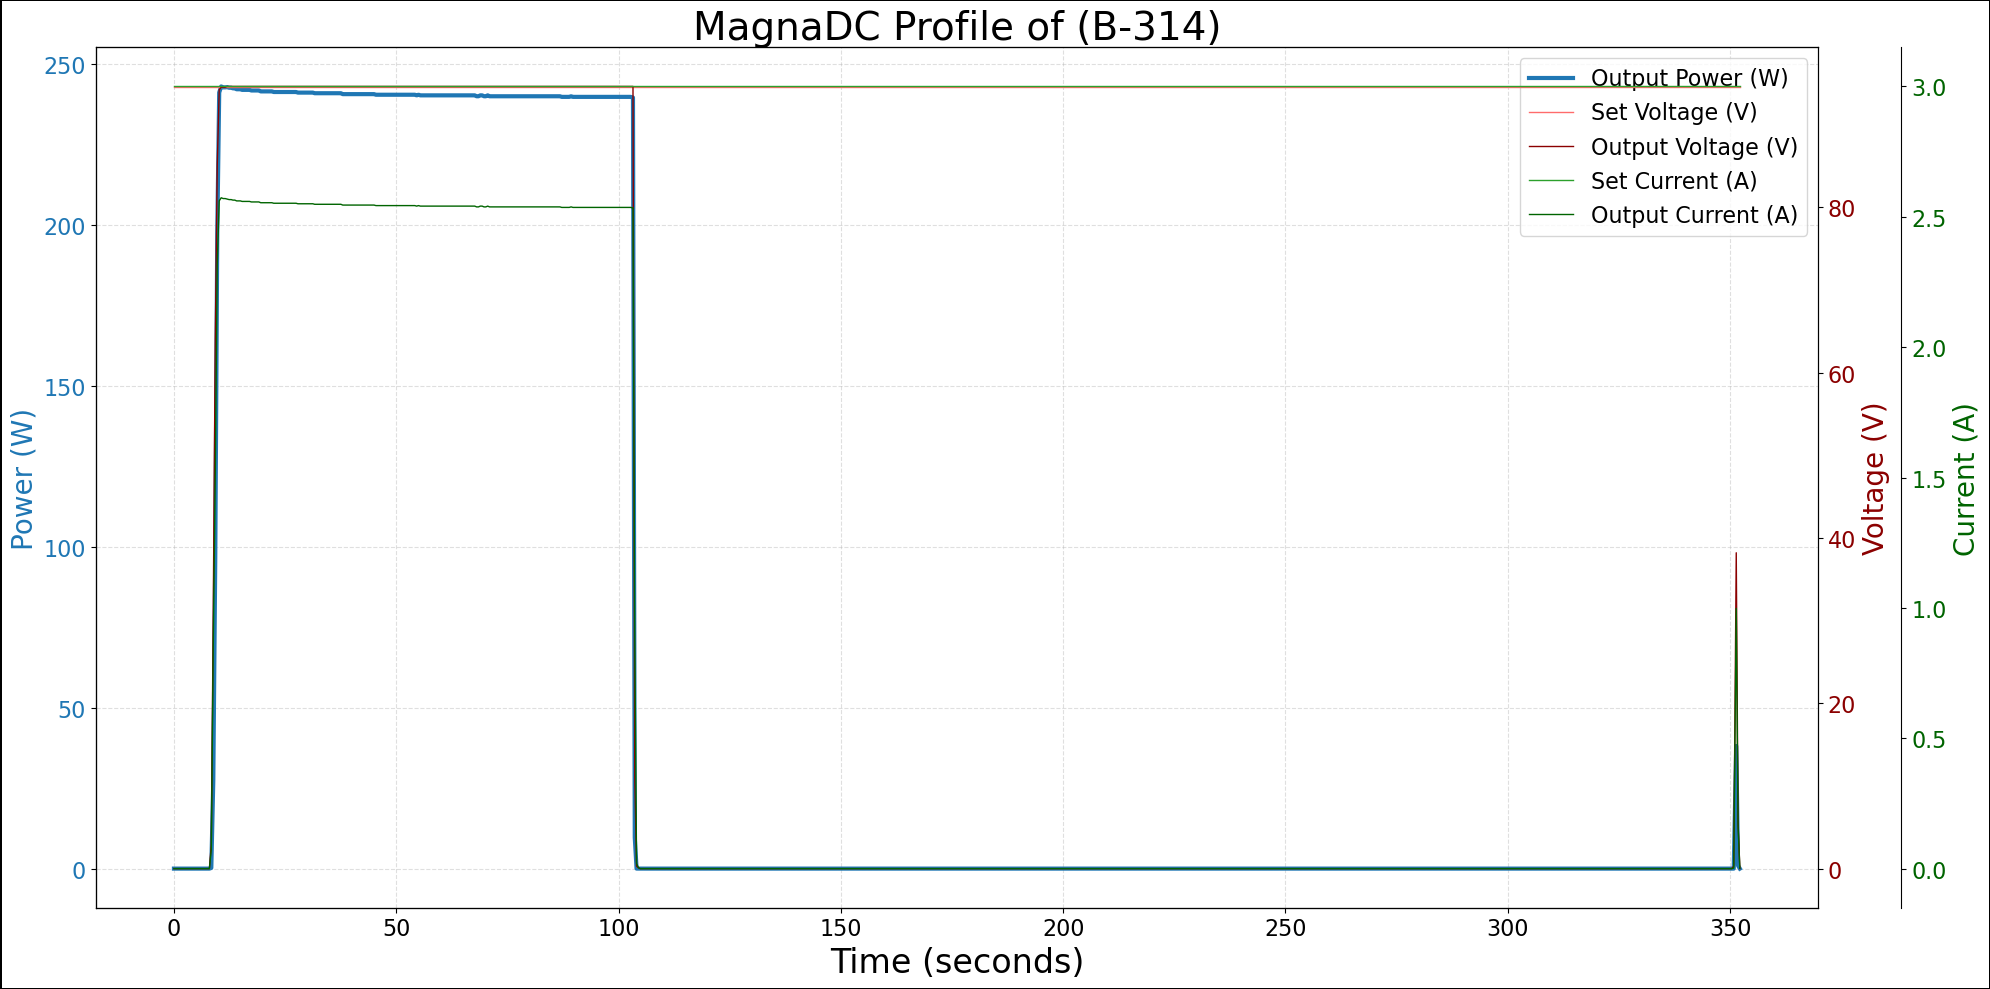

In [35]:
import matplotlib.pyplot as plt

# --- Create the figure & base axis (left y for Power) ---
fig, ax1 = plt.subplots(figsize=(20, 10))

# Color palette
dark_red  = '#8B0000'  # voltage (Output)
light_red = '#FF6B6B'  # voltage (Set)
green     = '#2CA02C'  # current (Set)
dark_green= '#006400'  # current (Output)
blue      = '#1F77B4'  # power

# Left y-axis: Power
p_line,   = ax1.plot(time_dc, Power_Watts, label='Output Power (W)', color=blue, linewidth=3)
ax1.set_xlabel("Time (seconds)", fontsize=24)
ax1.set_ylabel("Power (W)", fontsize=20, color=blue)
ax1.tick_params(axis='y', labelcolor=blue)
ax1.grid(True, linestyle='--', alpha=0.4)

# First right y-axis (Voltage)
ax2 = ax1.twinx()
vset_line,   = ax2.plot(time_dc, Set_Voltage,    label='Set Voltage (V)',    color=light_red, linewidth=1)
vout_line,   = ax2.plot(time_dc, Output_Voltage, label='Output Voltage (V)', color=dark_red,  linewidth=1)
ax2.set_ylabel("Voltage (V)", fontsize=20, color=dark_red)
ax2.tick_params(axis='y', labelcolor=dark_red)

# Second right y-axis (Current), offset outward
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # push this axis outward
# for older Matplotlib, also:
ax3.spines['right'].set_visible(True)

iset_line,  = ax3.plot(time_dc, Set_Current,    label='Set Current (A)',    color=green,      linewidth=1)
iout_line,  = ax3.plot(time_dc, Output_Current, label='Output Current (A)', color=dark_green, linewidth=1)
ax3.set_ylabel("Current (A)", fontsize=20, color=dark_green)
ax3.tick_params(axis='y', labelcolor=dark_green)

# Title & ticks
ax1.set_title(f"MagnaDC Profile of (B-{boiling_id})", fontsize=28)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)

# Build a single legend from all lines
lines = [p_line, vset_line, vout_line, iset_line, iout_line]
labels = [l.get_label() for l in lines]
leg = ax1.legend(lines, labels, fontsize=16, loc='upper right', frameon=True)

# Add a figure border
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('black')

plt.tight_layout()
plt.show()


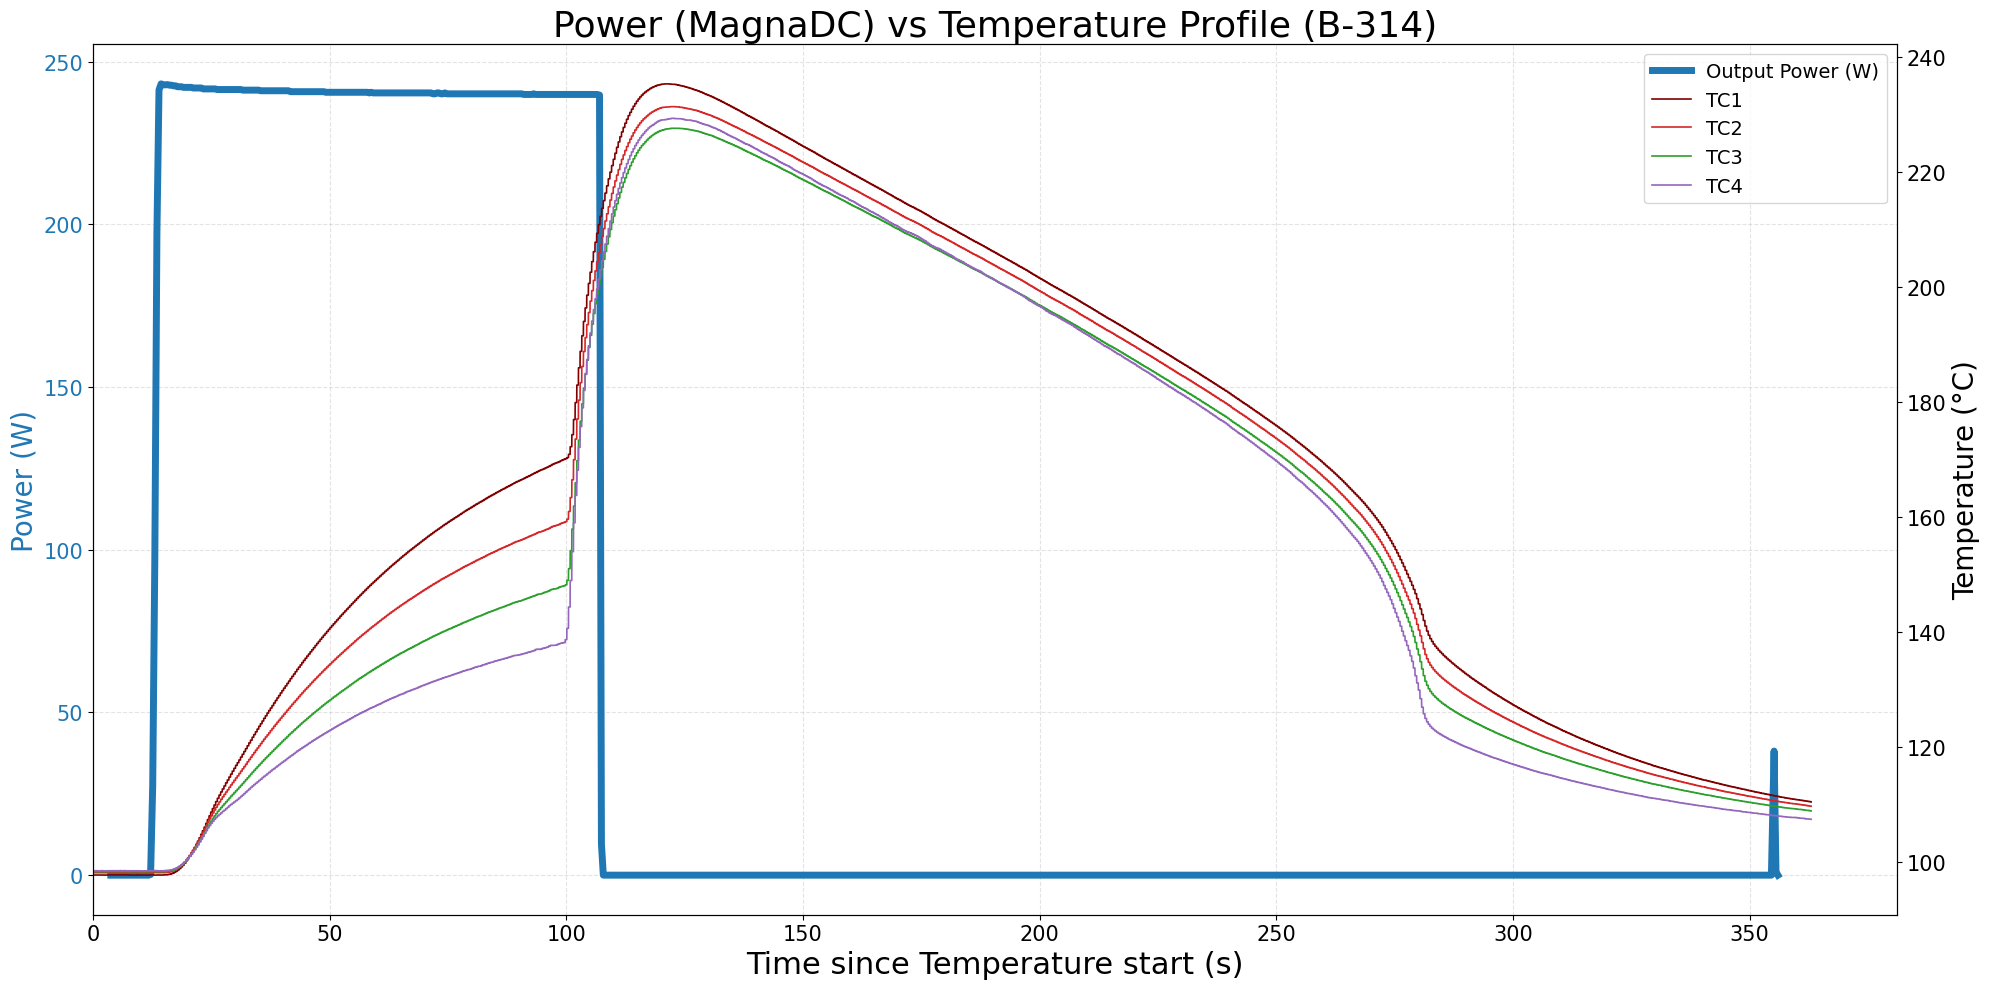

In [41]:
# 1) Compute start-time offset (DC start relative to Temperature start)
def hms_to_seconds(h, m, s): 
    return h*3600 + m*60 + s

temp_t0 = hms_to_seconds(Temperature_hour, Temperature_minute, Temperature_second)
dc_t0   = hms_to_seconds(dc_hour, dc_minute, dc_second)

offset_s = dc_t0 - temp_t0
# If runs could cross midnight, optionally handle wrap:
# if offset_s < -12*3600: offset_s += 24*3600
# if offset_s >  12*3600: offset_s -= 24*3600

# 2) Build aligned time axes (relative to Temperature start)
time_temp = dataframes['Temperature']['Time (sec)'].to_numpy(dtype=float)
time_dc   = dataframes['MagnaDC']['Time (sec)'].to_numpy(dtype=float) + offset_s

# 3) (Optional) drop Comment if present
for k in ['Temperature','MagnaDC']:
    if 'Comment' in dataframes[k].columns:
        dataframes[k].drop(columns=['Comment'], inplace=True)

# 4) Grab series
TC1 = dataframes['Temperature']['Thermo-couple_1'].to_numpy(dtype=float)
TC2 = dataframes['Temperature']['Thermo-couple_2'].to_numpy(dtype=float)
TC3 = dataframes['Temperature']['Thermo-couple_3'].to_numpy(dtype=float)
TC4 = dataframes['Temperature']['Thermo-couple_4'].to_numpy(dtype=float)
Power_Watts = dataframes['MagnaDC']['Output Power (W)'].to_numpy(dtype=float)

# 5) Plot: left y = Power, right y = Temperatures (4 lines)
fig, ax1 = plt.subplots(figsize=(20, 10))

# Colors
blue   = '#1F77B4'   # power
maroon = '#800000'
red    = '#D62728'
teal   = '#2CA02C'
purple = '#9467BD'

# Left axis: Power
p_line, = ax1.plot(time_dc, Power_Watts, color=blue, lw=5, label='Output Power (W)')
ax1.set_xlabel('Time since Temperature start (s)', fontsize=22)
ax1.set_ylabel('Power (W)', fontsize=20, color=blue)
ax1.tick_params(axis='y', labelcolor=blue)
ax1.grid(True, ls='--', alpha=0.35)

# Right axis: Temperatures
ax2 = ax1.twinx()
tc1_line, = ax2.plot(time_temp, TC1, color=maroon, lw=1.2, label='TC1')
tc2_line, = ax2.plot(time_temp, TC2, color=red,    lw=1.2, label='TC2')
tc3_line, = ax2.plot(time_temp, TC3, color=teal,   lw=1.2, label='TC3')
tc4_line, = ax2.plot(time_temp, TC4, color=purple, lw=1.2, label='TC4')
ax2.set_ylabel('Temperature (°C)', fontsize=20)
ax2.tick_params(axis='y')

# Title & ticks
ax1.set_title(f"Power (MagnaDC) vs Temperature Profile (B-{boiling_id})", fontsize=26)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

# Legend (combine both axes)
lines = [p_line, tc1_line, tc2_line, tc3_line, tc4_line]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize=14, loc='upper right')

plt.xlim(0,None)
plt.tight_layout()
plt.show()